# Project Statement

You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Import DataSet

In [3]:
T_shirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [4]:
T_shirt.head(5)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [5]:
T_shirt.tail(5)

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


# Create Testing and Training Data Set

In [10]:
#: means all row elements, anmd the 0:2 means take values in column 0 and 1... not 2
X =T_shirt.iloc[:,0:2]

In [11]:
X

,Height (in cms),Weight (in kgs)
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [13]:
y = T_shirt.iloc[:,2].values

In [14]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [18]:
# Changed the letters to 0 and 1, small = 1 and large = 0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [19]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 5)

In [29]:
X_train.shape

(13, 2)

In [30]:
X_test.shape

(5, 2)

# Train the Model

In [31]:
# Shift tab show more info, n_neighbors is used by default (5), our metric is minkowski and is the standard Euclidean metric that we need to use for this project
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

# Test Model

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
y_pred

array([1, 1, 0, 1, 0], dtype=int64)

In [34]:
y_test

array([1, 1, 0, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

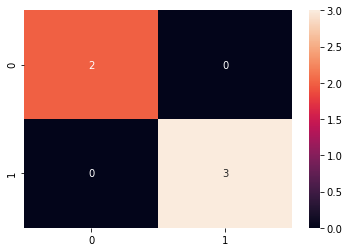

In [37]:
sns.heatmap(cm, annot = True)

#  Visualize Results

In [39]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key